#Importing Necessary Library


In [ ]:
import pandas as pd #importing pandas library
import numpy as np #import Numpy library
import matplotlib.pyplot as plt #Importing Matplot Lib library
import seaborn as sns #importing Sea born library
import nltk #import NLTK package
from nltk.corpus import stopwords  #Importing Stopwords Package from NLTK
from nltk.tokenize import word_tokenize #Importing word tokenize package from NLTK
from nltk.stem import WordNetLemmatizer, PorterStemmer #importing wordnetlemmatizer and porterstemmer package from NLTK
import re #Importing Regular Expression Library
import emoji #Importing Emoji Package
from sklearn.preprocessing import LabelEncoder #importing label Encoder form Sklearn  package
from wordcloud import WordCloud #Importing WordCloud library
from sklearn.model_selection import train_test_split #importing train_test_split package
from sklearn.feature_extraction.text import TfidfVectorizer # importing Vectorizer
from xgboost import XGBClassifier #Importing XGBoost Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #importing Evaluation score packages
from sklearn.metrics import classification_report, confusion_matrix #importing Evaluation Matrix package
from lightgbm import LGBMClassifier #Importing LGBM Classifier
from sklearn.ensemble import AdaBoostClassifier #Importing Adaboost classifier

#Data reading and data Overview

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP Project/Suicide_Detection.csv/Suicide_Detection.csv") #Reading the data set

In [ ]:
df.head(5) #Printing first 5 rows of dataset

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [ ]:
df.tail(5) #Printing Last 5 Rows of dataset

,Unnamed: 0,text,class
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide
232073,348110,I still haven't beaten the first boss in Hollo...,non-suicide


In [ ]:
df.info() #printing Information of Columns of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [ ]:
df.isnull().sum() #Printing Number of Null values in Dataset

Unnamed: 0    0
text          0
class         0
dtype: int64

In [ ]:
df.drop('Unnamed: 0', inplace= True , axis =1) #Droping Unwanted column from dataset

In [ ]:
df.head(5) #printing first 5 rows of data set after droping Column

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


#NLP Preprocessing

In [ ]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Define text preprocessing function
def preprocess_text(text):

    text = text.lower() #Converting Text into Lowercase


    tokens = word_tokenize(text) #Tokenizing the text

    # Remove stopwords
    stop_words = set(stopwords.words('english')) #Setting Stopwords category to be removed
    tokens = [token for token in tokens if token not in stop_words] #Removing Stopwords from tokenize text


    lemmatizer = WordNetLemmatizer() #Initiating Lemmatizer
    stemmer = PorterStemmer() #Initiating Stemmer


    tokens = [lemmatizer.lemmatize(token) for token in tokens] #Lemmatizing the tokenize text
    tokens = [stemmer.stem(token) for token in tokens] #Stemming the tokenize text


    tokens = [re.sub(r'[^a-zA-Z0-9\s]', '', token) for token in tokens] #Removing special Characters
    tokens = [emoji.demojize(token) for token in tokens] #removing Emojis


    tokens = [token for token in tokens if token.strip() != ''] #Removing empty Tokens

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

df['preprocessed_text'] = df['text'].apply(preprocess_text) #apply text preprocessing into the text column


In [ ]:
df.head(5) #Printing first 5 rows of  dataset after NLP preprocessing

,text,class,preprocessed_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threaten suiciderec left wife good che...
1,Am I weird I don't get affected by compliments...,non-suicide,weird nt get affect compliment s come someon k...
2,Finally 2020 is almost over... So I can never ...,non-suicide,final 2020 almost never hear 2020 bad year eve...
3,i need helpjust help me im crying so hard,suicide,need helpjust help im cri hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,losthello name adam 16 struggl year afraid pas...


#Encoding variable

In [ ]:


LE = LabelEncoder() #Initializing Label Encoder


df['class'] = LE.fit_transform(df['class']) #Converting the class column into binary form



In [ ]:
df #Printing dataset

,text,class,preprocessed_text
0,Ex Wife Threatening SuicideRecently I left my ...,1,ex wife threaten suiciderec left wife good che...
1,Am I weird I don't get affected by compliments...,0,weird nt get affect compliment s come someon k...
2,Finally 2020 is almost over... So I can never ...,0,final 2020 almost never hear 2020 bad year eve...
3,i need helpjust help me im crying so hard,1,need helpjust help im cri hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",1,losthello name adam 16 struggl year afraid pas...
...,...,...,...
232069,If you don't like rock then your not going to ...,0,nt like rock go get anyth go http musictastesp...
232070,You how you can tell i have so many friends an...,0,tell mani friend lone everyth depriv prebought...
232071,pee probably tastes like salty tea😏💦‼️ can som...,0,pee probabl tast like salti tea someon drank p...
232072,The usual stuff you find hereI'm not posting t...,1,usual stuff find herei m post sympathi piti kn...


#Exploratory Data Analysis (EDA)

In [ ]:


suicide_text = ' '.join([' '.join(words) for words in df[df['class'] == 1]['text']]) #Converting list of words into string for class = 1
non_suicide_text = ' '.join([' '.join(words) for words in df[df['class'] == 0]['text']]) #converting list of words into string from class = 2


suicide_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(suicide_text) #Generating Word cloud for Suicide text
non_suicide_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_suicide_text) #Generating Word Cloud for non Suicide text

# Plot word clouds
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

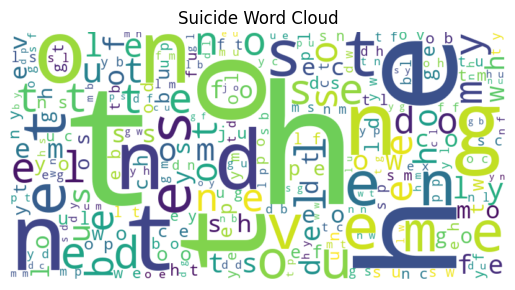

In [ ]:
plt.imshow(suicide_wordcloud, interpolation='bilinear')
plt.title('Suicide Word Cloud')
plt.axis('off')
plt.show()

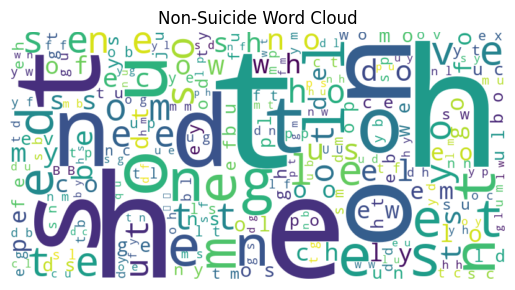

In [ ]:
plt.imshow(non_suicide_wordcloud, interpolation='bilinear')
plt.title('Non-Suicide Word Cloud')
plt.axis('off')
plt.show()

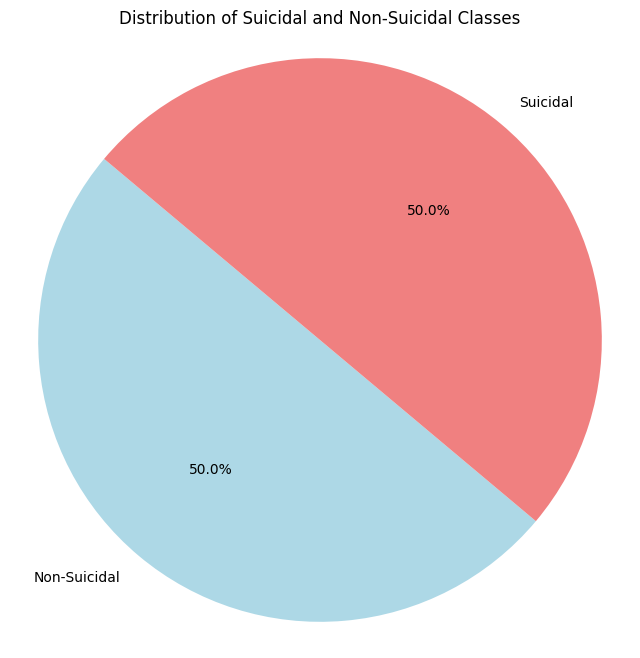

In [ ]:


class_counts = df['class'].value_counts() #Counting the occurrences of each class


labels = ['Non-Suicidal', 'Suicidal'] #Defining the labels for oie chart


colors = ['lightblue', 'lightcoral'] #Defining colors for different classes


plt.figure(figsize=(8, 8)) #Assigning the size of pie chart
plt.pie(class_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140) #ploting pie chart
plt.title('Distribution of Suicidal and Non-Suicidal Classes') #Assigning the title to pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show() #Show pie chart


#Assigning Xand Y Variables

In [ ]:

X = df['preprocessed_text'] #X variable is assigned
y = df['class'] #Y variable is assigned



#Splitting Data into Training and testing dataset

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Vectorizing Object type column

In [ ]:
tfidf_vectorizer = TfidfVectorizer() #Initializing the TFIDF vectorizer

# Fit and transform the preprocessed text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#Training Results

#XGBoost Model

In [ ]:


xgb_clf = XGBClassifier() #Initializing the XGBoost Classifier


xgb_clf.fit(X_train_tfidf, y_train) #Trainign the classifier


train_preds_XGB = xgb_clf.predict(X_train_tfidf) #Predicting scores on trainig set


test_preds_XGB = xgb_clf.predict(X_test_tfidf) #predicting Scores on testing set

# Calculate evaluation metrics for training set
train_accuracy_XGB = accuracy_score(y_train, train_preds_XGB)
train_precision_XGB = precision_score(y_train, train_preds_XGB)
train_recall_XGB = recall_score(y_train, train_preds_XGB)
train_f1_score_XGB = f1_score(y_train, train_preds_XGB)


# Print evaluation metrics
print("Training Accuracy:", train_accuracy_XGB)
print("Training Precision:", train_precision_XGB)
print("Training Recall:", train_recall_XGB)
print("Training F1 Score:", train_f1_score_XGB)


Training Accuracy: 0.9283309723740837
Training Precision: 0.9488165446939029
Training Recall: 0.9056388509186408
Training F1 Score: 0.926725039925106


In [ ]:

# Classification report and confusion matrix for training set
print("Training Set Metrics of XGBoost :")
print("Classification Report of XGBoost :")
print(classification_report(y_train, train_preds_XGB))


Training Set Metrics of XGBoost :
Classification Report of XGBoost :
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     92750
           1       0.95      0.91      0.93     92909

    accuracy                           0.93    185659
   macro avg       0.93      0.93      0.93    185659
weighted avg       0.93      0.93      0.93    185659



Confusion Matrix of XGBoost :
[[88211  4539]
 [ 8767 84142]]


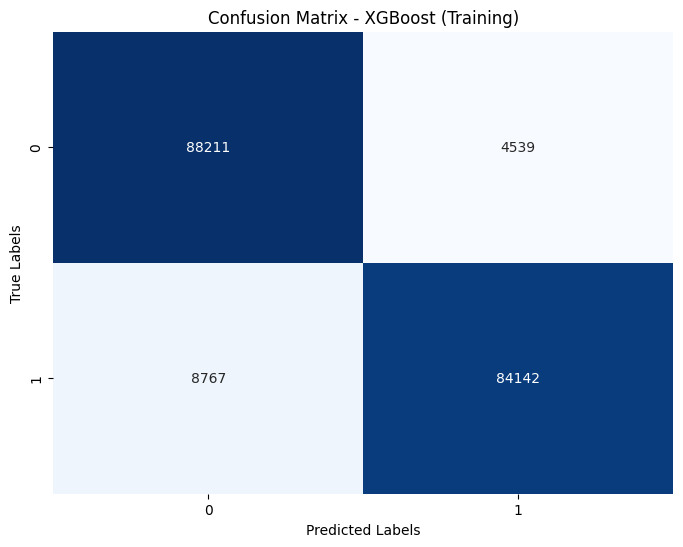

In [ ]:

# Confusion matrix for training set
print("Confusion Matrix of XGBoost :")
cm = confusion_matrix(y_train, train_preds_XGB) #calculating Confusion matrix of training set
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost (Training)')
plt.show()

#LGBM Model

In [ ]:


lgbm_clf = LGBMClassifier(verbosity=-1) #initiating LGBM Classifier


lgbm_clf.fit(X_train_tfidf, y_train) #training the classifier


train_preds_LGBM = lgbm_clf.predict(X_train_tfidf) #Predicting scores on training set


test_preds_LGBM = lgbm_clf.predict(X_test_tfidf) #predicting Scores on testing set

# Calculate evaluation metrics for training set
train_accuracy_LGBM= accuracy_score(y_train, train_preds_LGBM)
train_precision_LGBM = precision_score(y_train, train_preds_LGBM)
train_recall_LGBM = recall_score(y_train, train_preds_LGBM)
train_f1_score_LGBM = f1_score(y_train, train_preds_LGBM)



# Print evaluation metrics
print("Training Accuracy:", train_accuracy_LGBM)
print("Training Precision:", train_precision_LGBM)
print("Training Recall:", train_recall_LGBM)
print("Training F1 Score:", train_f1_score_LGBM)



Training Accuracy: 0.9242913082586893
Training Precision: 0.9345236127183556
Training Recall: 0.9126564703096578
Training F1 Score: 0.9234606085687525


In [ ]:

# Classification report and confusion matrix for training set
print("Training Set Metrics of LGBM Model:")
print("Classification Report of LGBM Model:")
print(classification_report(y_train, train_preds_LGBM))





Training Set Metrics of LGBM Model:
Classification Report of LGBM Model:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     92750
           1       0.93      0.91      0.92     92909

    accuracy                           0.92    185659
   macro avg       0.92      0.92      0.92    185659
weighted avg       0.92      0.92      0.92    185659



Confusion Matrix of LGBM Model:
[[86809  5941]
 [ 8115 84794]]


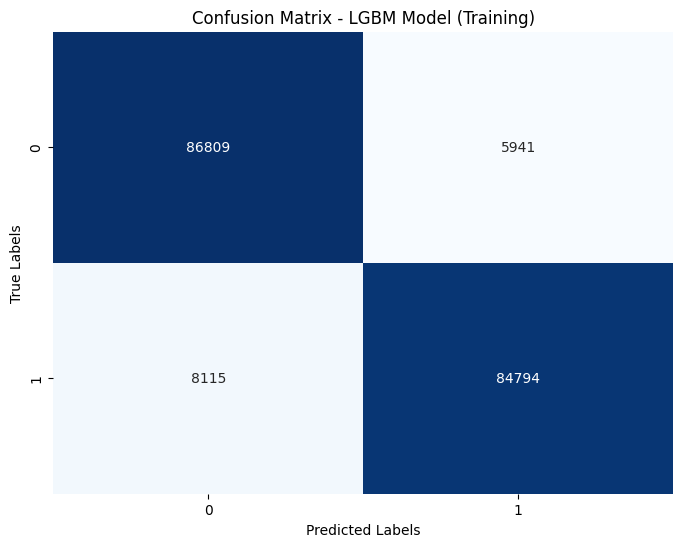

In [ ]:

# Confusion matrix for training set
print("Confusion Matrix of LGBM Model:")
cm = confusion_matrix(y_train, train_preds_LGBM) #calculating Confusion Matrix
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - LGBM Model (Training)')
plt.show()

#AdaBoost Model

In [ ]:
adaboost_clf = AdaBoostClassifier() #initializing Adaboost Classifier

adaboost_clf.fit(X_train_tfidf, y_train) #training the classifier


train_preds_adaboost = adaboost_clf.predict(X_train_tfidf) #predicting Socres on Training Set


test_preds_adaboost = adaboost_clf.predict(X_test_tfidf) #Predicting Scores on Testing set

# Calculate evaluation metrics for training set
train_accuracy_adaboost = accuracy_score(y_train, train_preds_adaboost)
train_precision_adaboost = precision_score(y_train, train_preds_adaboost)
train_recall_adaboost = recall_score(y_train, train_preds_adaboost)
train_f1_score_adaboost = f1_score(y_train, train_preds_adaboost)


# Print evaluation metrics
print("Training Accuracy:", train_accuracy_adaboost)
print("Training Precision:", train_precision_adaboost)
print("Training Recall:", train_recall_adaboost)
print("Training F1 Score:", train_f1_score_adaboost)



Training Accuracy: 0.8822626428021265
Training Precision: 0.922866325437448
Training Recall: 0.8344724407753824
Training F1 Score: 0.8764462833273984


In [ ]:

# Classification report and confusion matrix for training set
print("Training Set Metrics of AdaBoost Model:")
print("Classification Report of AdaBoost Model:")
print(classification_report(y_train, train_preds_adaboost))



Training Set Metrics of AdaBoost Model:
Classification Report of AdaBoost Model:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     92750
           1       0.92      0.83      0.88     92909

    accuracy                           0.88    185659
   macro avg       0.89      0.88      0.88    185659
weighted avg       0.89      0.88      0.88    185659



Confusion Matrix of AdaBoost Model:
[[86270  6480]
 [15379 77530]]


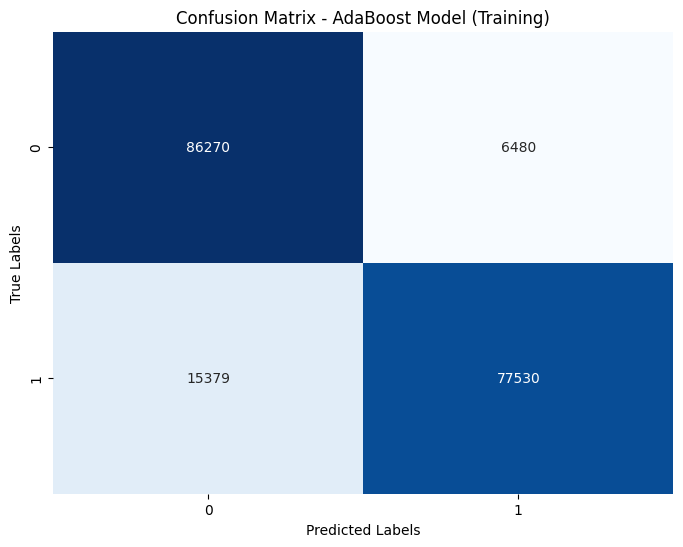

In [ ]:

# Confusion matrix for training set
print("Confusion Matrix of AdaBoost Model:")
cm = confusion_matrix(y_train, train_preds_adaboost) #calculating Confusion matrix
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - AdaBoost Model (Training)')
plt.show()

#Testing Results

#XGBoost

In [ ]:
# Calculate evaluation metrics for testing set
test_accuracy_XGB = accuracy_score(y_test, test_preds_XGB)
test_precision_XGB = precision_score(y_test, test_preds_XGB)
test_recall_XGB = recall_score(y_test, test_preds_XGB)
test_f1_score_XGB = f1_score(y_test, test_preds_XGB)

print("\nTesting Accuracy:", test_accuracy_XGB)
print("Testing Precision:", test_precision_XGB)
print("Testing Recall:", test_recall_XGB)
print("Testing F1 Score:", test_f1_score_XGB)



Testing Accuracy: 0.9156307228266725
Testing Precision: 0.9333273186575244
Testing Recall: 0.8945866482186094
Testing F1 Score: 0.9135464500176615


In [ ]:
# Classification report and confusion matrix for testing set
print("\nTesting Set Metrics of XGBoost :")
print("Classification Report of XGBoost :")
print(classification_report(y_test, test_preds_XGB))



Testing Set Metrics of XGBoost :
Classification Report of XGBoost :
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     23287
           1       0.93      0.89      0.91     23128

    accuracy                           0.92     46415
   macro avg       0.92      0.92      0.92     46415
weighted avg       0.92      0.92      0.92     46415



Confusion Matrix of XGBoost Model:
[[21809  1478]
 [ 2438 20690]]


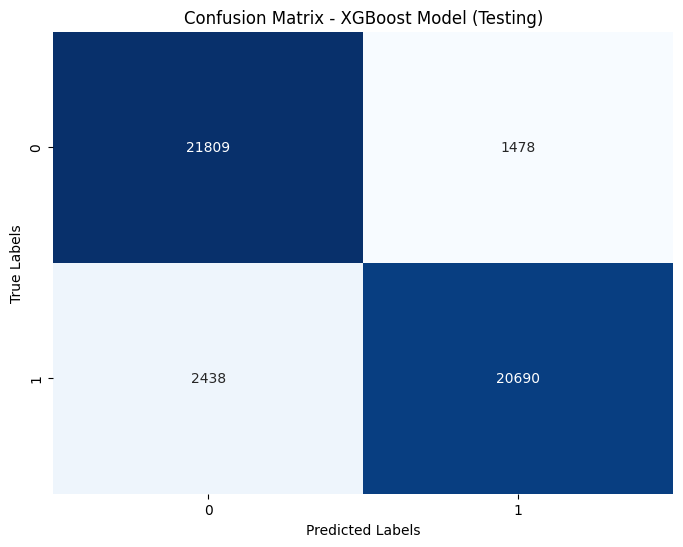

In [ ]:

# Confusion matrix for testing set
print("Confusion Matrix of XGBoost Model:")
cm = confusion_matrix(y_test, test_preds_XGB)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost Model (Testing)')
plt.show()

#LGBM Model

In [ ]:
# Calculate evaluation metrics for testing set
test_accuracy_LGBM = accuracy_score(y_test, test_preds_LGBM)
test_precision_LGBM = precision_score(y_test, test_preds_LGBM)
test_recall_LGBM = recall_score(y_test, test_preds_LGBM)
test_f1_score_LGBM = f1_score(y_test, test_preds_LGBM)

print("\nTesting Accuracy:", test_accuracy_LGBM)
print("Testing Precision:", test_precision_LGBM)
print("Testing Recall:", test_recall_LGBM)
print("Testing F1 Score:", test_f1_score_LGBM)


Testing Accuracy: 0.9177421092319293
Testing Precision: 0.9267591937765205
Testing Recall: 0.9065634728467659
Testing F1 Score: 0.9165500961706592


In [ ]:
# Classification report and confusion matrix for testing set
print("\nTesting Set Metrics of LGBM Model:")
print("Classification Report of LGBM Model:")
print(classification_report(y_test, test_preds_LGBM))



Testing Set Metrics of LGBM Model:
Classification Report of LGBM Model:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     23287
           1       0.93      0.91      0.92     23128

    accuracy                           0.92     46415
   macro avg       0.92      0.92      0.92     46415
weighted avg       0.92      0.92      0.92     46415



Confusion Matrix of LGBM Model:
[[21630  1657]
 [ 2161 20967]]


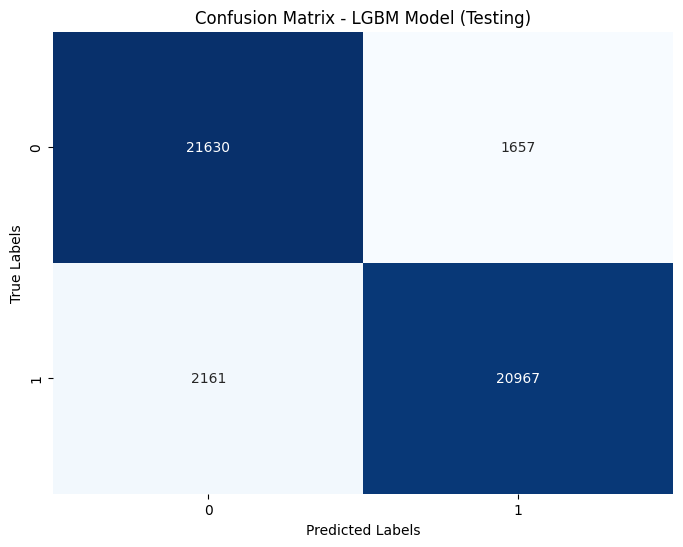

In [ ]:

# Confusion matrix for testing set
print("Confusion Matrix of LGBM Model:")
cm = confusion_matrix(y_test, test_preds_LGBM)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - LGBM Model (Testing)')
plt.show()

#AdaBoost Model

In [ ]:
# Calculate evaluation metrics for testing set
test_accuracy_adaboost = accuracy_score(y_test, test_preds_adaboost)
test_precision_adaboost = precision_score(y_test, test_preds_adaboost)
test_recall_adaboost = recall_score(y_test, test_preds_adaboost)
test_f1_score_adaboost = f1_score(y_test, test_preds_adaboost)


print("\nTesting Accuracy:", test_accuracy_adaboost)
print("Testing Precision:", test_precision_adaboost)
print("Testing Recall:", test_recall_adaboost)
print("Testing F1 Score:", test_f1_score_adaboost)


Testing Accuracy: 0.8799526015296779
Testing Precision: 0.92
Testing Recall: 0.8313732272570045
Testing F1 Score: 0.8734441718906151


In [ ]:
# Classification report and confusion matrix for testing set
print("\nTesting Set Metrics of AdaBoost Model:")
print("Classification Report of AdaBoost Model:")
print(classification_report(y_test, test_preds_adaboost))



Testing Set Metrics of AdaBoost Model:
Classification Report of AdaBoost Model:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     23287
           1       0.92      0.83      0.87     23128

    accuracy                           0.88     46415
   macro avg       0.88      0.88      0.88     46415
weighted avg       0.88      0.88      0.88     46415



Confusion Matrix of AdaBoost Model:
[[21615  1672]
 [ 3900 19228]]


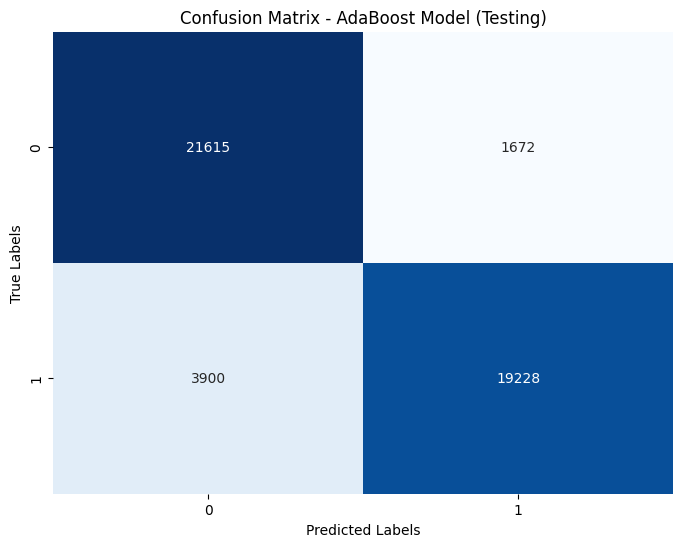

In [ ]:

# Confusion matrix for testing set
print("Confusion Matrix of AdaBoost Model:")
cm = confusion_matrix(y_test, test_preds_adaboost)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - AdaBoost Model (Testing)')
plt.show()

#Comparison of training and testing score

In [ ]:


# Define the metrics and models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = ['XGBoost', 'LightGBM', 'AdaBoost']

# Define the scores for each model
training_scores = [
    [train_accuracy_XGB, train_precision_XGB, train_recall_XGB, train_f1_score_XGB],
    [train_accuracy_LGBM, train_precision_LGBM, train_recall_LGBM, train_f1_score_LGBM],
    [train_accuracy_adaboost, train_precision_adaboost, train_recall_adaboost, train_f1_score_adaboost]
]
testing_scores = [
    [test_accuracy_XGB, test_precision_XGB, test_recall_XGB, test_f1_score_XGB],
    [test_accuracy_LGBM, test_precision_LGBM, test_recall_LGBM, test_f1_score_LGBM],
    [test_accuracy_adaboost, test_precision_adaboost, test_recall_adaboost, test_f1_score_adaboost]
]



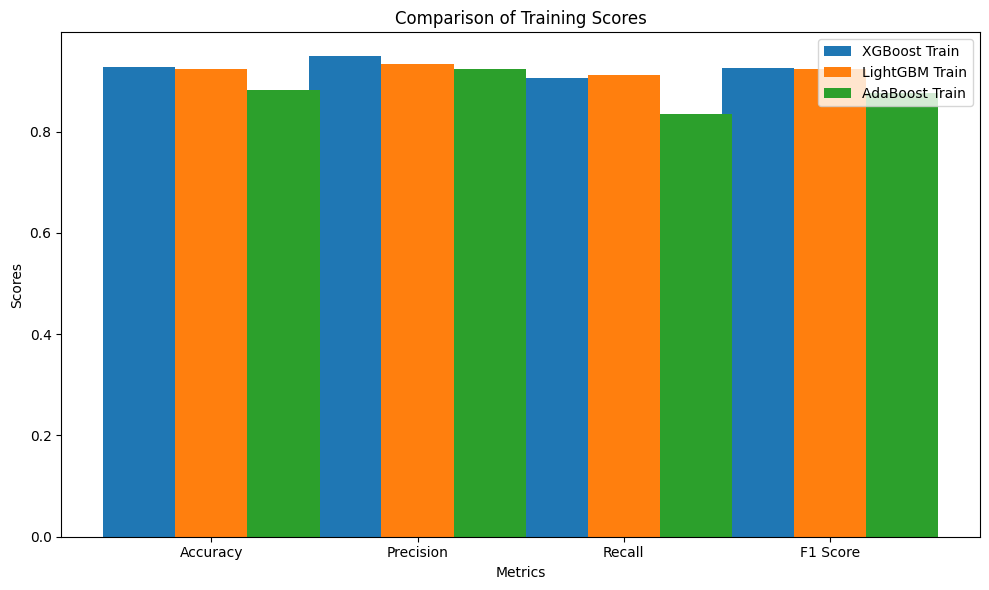

In [ ]:
# Plotting
bar_width = 0.35
index = list(range(len(metrics)))

# Plotting for training scores
plt.figure(figsize=(10, 6))
for i, model in enumerate(models):
    plt.bar([x + bar_width * i for x in index], training_scores[i], width=bar_width, label=f'{model} Train')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Training Scores')
plt.xticks([x + bar_width for x in index], metrics)
plt.legend()
plt.tight_layout()
plt.show()



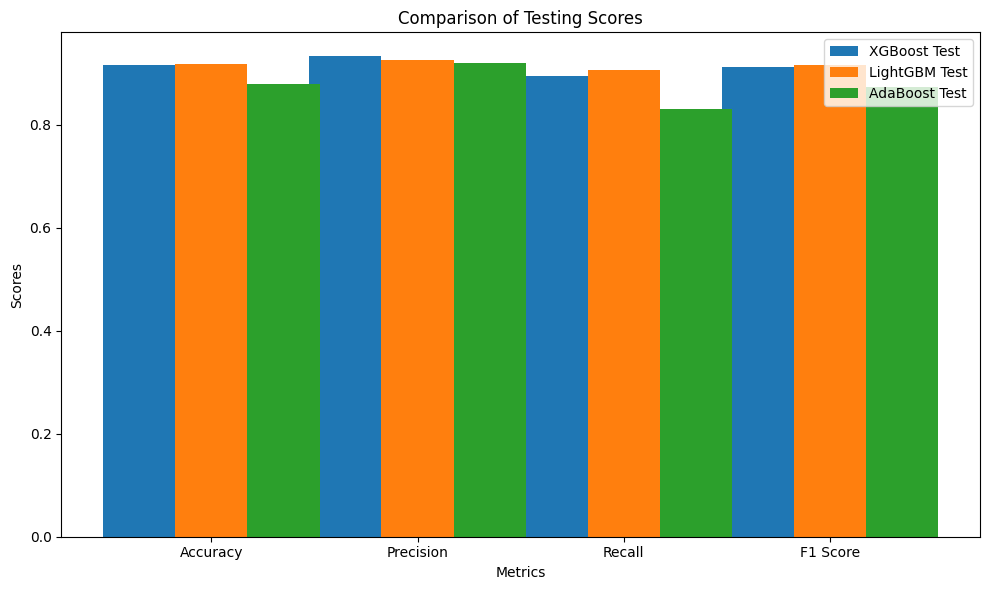

In [ ]:
# Plotting for testing scores
plt.figure(figsize=(10, 6))
for i, model in enumerate(models):
    plt.bar([x + bar_width * i for x in index], testing_scores[i], width=bar_width, label=f'{model} Test')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Testing Scores')
plt.xticks([x + bar_width for x in index], metrics)
plt.legend()
plt.tight_layout()
plt.show()
